In [378]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold
from imblearn.over_sampling import RandomOverSampler



In [379]:
import warnings
warnings.filterwarnings("ignore")


In [380]:
df_ufil_pred = pd.read_csv("../data/unfilled.csv")

target = pd.read_csv("../data/filtered_df.csv")['ICU']

In [381]:
# Set display options to show all columns
pd.set_option('display.max_columns', None)

# Display the head of the dataframe with all columns
df_ufil_pred.head()

,Sesso,Nazionalità,Età,Domicilio,Profilassi,Altezza,Peso,Comorbilità,Diabete,HIV,IRC,GCS,Prostrazione,Shock,Bleeding,ARDS,Anemia,Creatinina,Glicemia,Acidosi,Bilirubina,Hyperparasitaemia,Numerocriteri,Falciparum,Ovale,Parassitemiavaloreassoluto,Percentualeparassitemia,Ritardoterapeutico,PAsistolica,PAdiastolica,FC,FR,Temperatura,T0GBincellul,T0GRincellul,T0Hbingdl,T0PLTincellul,T0Glicemiainmgdl,T0Azotemiainmgdl,T0Creatininainmgdl,T0LDHinUL,T0ASTinUL,T0ALTinUL,T0Bilirubinatotinmgdl,T0Bilirubinadirettainmgdl,T0SodioinmEql,T0PotassioinmEql,T0Cainmgdl,T0INR,T0fibrinogenoinmgdl,T0pH,T0bicarbonatiinmmoll,T0Lattatiinmmoll,ArtesunatoevSomministrazione1Datainizioeora,ArtemetherLumefantrinaSomministrazione1Datainizioeora,DiidroartemisininaPiperachinaSomministrazione1Datainizioeora,ACT,ArtesunatoACT,AtovaquoneProguanile,Doxiciclinaperos,Clindamicina,Antibiotici,Chinino,Primachina,DurataArtesunato
0,1,1,57,0.0,0,160.0,55.0,0,0,0,0,0,1,0,0,0,0,0,0,0.0,0,0,1,1,0.0,NaN,1.0,7.0,110.0,60.0,65.0,14.0,37.8,4890.0,4210000.0,11.4,132000.0,99.0,29.0,0.94,338.0,31.0,33.0,1.08,NaN,136.0,3.4,8.40,1.15,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,1,0,0.0,0,0,0.0,NaN
1,0,0,62,0.0,0,159.0,70.0,0,0,0,0,0,1,0,0,0,0,0,0,0.0,0,0,1,1,0.0,NaN,1.0,7.0,140.0,90.0,124.0,14.0,38.5,5240.0,4980000.0,14.2,165000.0,104.0,40.0,1.00,260.0,31.0,39.0,0.82,NaN,140.0,3.9,9.40,1.19,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,1,0,0.0,0,0,0.0,NaN
2,1,0,72,0.0,0,175.0,83.0,1,0,0,0,0,0,1,0,0,0,0,0,0.0,0,0,1,1,0.0,7.0,0.2,2.0,80.0,60.0,87.0,NaN,39.0,6000.0,3010000.0,9.4,123000.0,107.0,38.0,0.91,474.0,18.0,18.0,1.75,0.36,139.0,4.0,8.13,1.10,369.0,7.41,30.4,2.6,1,0,1.0,1.0,1.0,0,0,0.0,0,0,0.0,1.0
3,1,0,53,0.0,0,177.0,96.0,1,1,0,0,0,0,0,0,0,0,1,0,0.0,0,1,2,1,0.0,572000.0,12.0,7.0,125.0,85.0,NaN,NaN,40.4,7040.0,4770000.0,14.4,19000.0,230.0,NaN,3.22,NaN,NaN,80.0,1.94,1.02,122.0,3.5,NaN,1.10,407.0,NaN,NaN,NaN,1,0,1.0,1.0,1.0,0,0,0.0,0,0,0.0,NaN
4,0,1,58,0.0,0,160.0,64.3,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,1,1,1,0.0,602100.0,13.5,7.0,107.0,40.0,125.0,16.0,40.0,2810.0,4460.0,14.5,58000.0,115.0,48.0,1.30,NaN,NaN,37.0,1.48,NaN,135.0,3.9,NaN,1.10,455.0,NaN,NaN,NaN,1,0,1.0,1.0,1.0,0,0,0.0,0,0,0.0,NaN


In [382]:
df_ufil_pred.shape[1]

65

In [383]:
empty_value_count = df_ufil_pred.isna().sum().sum()
nb_total_values = df_ufil_pred.shape[0]*df_ufil_pred.shape[1]

In [384]:
print("count is : " + str(target.count()) + " & sum is "+str(target.sum()))
print("empty_value_% = "+str(empty_value_count / nb_total_values))

count is : 72 & sum is 14
empty_value_% = 0.12756410256410255


In [385]:
# Number of folds
num_folds = 6

In [386]:
from sklearn.model_selection import KFold
import random

while True:
    # Initialize the KFold splitter with a random state
    random_state = random.randint(1, 10000)
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=random_state)

    trains_df = []
    tests_df = []
    targets_train_df = []
    targets_test_df = []

    # Split the data into 6 folds
    for train_index, test_index in kf.split(df_ufil_pred):
        # Create dataframes for training and testing
        train_df = df_ufil_pred.iloc[train_index]
        test_df = df_ufil_pred.iloc[test_index]

        # Append the training and testing dataframes to lists
        trains_df.append(train_df)
        tests_df.append(test_df)

        # Split the target into training and testing
        target_train_df = target.iloc[train_index]
        target_test_df = target.iloc[test_index]

        # Append the target dataframes to lists
        targets_train_df.append(target_train_df)
        targets_test_df.append(target_test_df)

    # Check if all target_train and target_test have at least two classes
    all_have_two_classes = all(len(df.unique()) >= 2 for df in targets_train_df + targets_test_df)

    if all_have_two_classes:
        break


In [387]:
train_0_base = trains_df[0].copy()

In [388]:
trains_df[0].head(5)

,Sesso,Nazionalità,Età,Domicilio,Profilassi,Altezza,Peso,Comorbilità,Diabete,HIV,IRC,GCS,Prostrazione,Shock,Bleeding,ARDS,Anemia,Creatinina,Glicemia,Acidosi,Bilirubina,Hyperparasitaemia,Numerocriteri,Falciparum,Ovale,Parassitemiavaloreassoluto,Percentualeparassitemia,Ritardoterapeutico,PAsistolica,PAdiastolica,FC,FR,Temperatura,T0GBincellul,T0GRincellul,T0Hbingdl,T0PLTincellul,T0Glicemiainmgdl,T0Azotemiainmgdl,T0Creatininainmgdl,T0LDHinUL,T0ASTinUL,T0ALTinUL,T0Bilirubinatotinmgdl,T0Bilirubinadirettainmgdl,T0SodioinmEql,T0PotassioinmEql,T0Cainmgdl,T0INR,T0fibrinogenoinmgdl,T0pH,T0bicarbonatiinmmoll,T0Lattatiinmmoll,ArtesunatoevSomministrazione1Datainizioeora,ArtemetherLumefantrinaSomministrazione1Datainizioeora,DiidroartemisininaPiperachinaSomministrazione1Datainizioeora,ACT,ArtesunatoACT,AtovaquoneProguanile,Doxiciclinaperos,Clindamicina,Antibiotici,Chinino,Primachina,DurataArtesunato
0,1,1,57,0.0,0,160.0,55.0,0,0,0,0,0,1,0,0,0,0,0,0,0.0,0,0,1,1,0.0,NaN,1.0,7.0,110.0,60.0,65.0,14.0,37.8,4890.0,4210000.0,11.4,132000.0,99.0,29.0,0.94,338.0,31.0,33.0,1.08,NaN,136.0,3.4,8.40,1.15,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,1,0,0.0,0,0,0.0,NaN
1,0,0,62,0.0,0,159.0,70.0,0,0,0,0,0,1,0,0,0,0,0,0,0.0,0,0,1,1,0.0,NaN,1.0,7.0,140.0,90.0,124.0,14.0,38.5,5240.0,4980000.0,14.2,165000.0,104.0,40.0,1.00,260.0,31.0,39.0,0.82,NaN,140.0,3.9,9.40,1.19,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,1,0,0.0,0,0,0.0,NaN
2,1,0,72,0.0,0,175.0,83.0,1,0,0,0,0,0,1,0,0,0,0,0,0.0,0,0,1,1,0.0,7.0,0.2,2.0,80.0,60.0,87.0,NaN,39.0,6000.0,3010000.0,9.4,123000.0,107.0,38.0,0.91,474.0,18.0,18.0,1.75,0.36,139.0,4.0,8.13,1.10,369.0,7.41,30.4,2.6,1,0,1.0,1.0,1.0,0,0,0.0,0,0,0.0,1.0
4,0,1,58,0.0,0,160.0,64.3,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,1,1,1,0.0,602100.0,13.5,7.0,107.0,40.0,125.0,16.0,40.0,2810.0,4460.0,14.5,58000.0,115.0,48.0,1.30,NaN,NaN,37.0,1.48,NaN,135.0,3.9,NaN,1.10,455.0,NaN,NaN,NaN,1,0,1.0,1.0,1.0,0,0,0.0,0,0,0.0,NaN
5,1,0,60,0.0,0,169.0,75.0,1,0,0,0,0,1,1,0,0,0,1,0,1.0,1,0,5,1,0.0,110000.0,2.7,2.0,75.0,40.0,80.0,22.0,36.7,12580.0,3190000.0,9.2,33000.0,131.0,392.0,6.60,NaN,98.0,78.0,3.70,2.70,140.0,3.0,6.70,1.24,317.0,7.43,23.9,1.3,1,0,1.0,1.0,1.0,0,1,0.0,1,0,0.0,NaN


In [389]:
tests_df[0].head(5)

,Sesso,Nazionalità,Età,Domicilio,Profilassi,Altezza,Peso,Comorbilità,Diabete,HIV,IRC,GCS,Prostrazione,Shock,Bleeding,ARDS,Anemia,Creatinina,Glicemia,Acidosi,Bilirubina,Hyperparasitaemia,Numerocriteri,Falciparum,Ovale,Parassitemiavaloreassoluto,Percentualeparassitemia,Ritardoterapeutico,PAsistolica,PAdiastolica,FC,FR,Temperatura,T0GBincellul,T0GRincellul,T0Hbingdl,T0PLTincellul,T0Glicemiainmgdl,T0Azotemiainmgdl,T0Creatininainmgdl,T0LDHinUL,T0ASTinUL,T0ALTinUL,T0Bilirubinatotinmgdl,T0Bilirubinadirettainmgdl,T0SodioinmEql,T0PotassioinmEql,T0Cainmgdl,T0INR,T0fibrinogenoinmgdl,T0pH,T0bicarbonatiinmmoll,T0Lattatiinmmoll,ArtesunatoevSomministrazione1Datainizioeora,ArtemetherLumefantrinaSomministrazione1Datainizioeora,DiidroartemisininaPiperachinaSomministrazione1Datainizioeora,ACT,ArtesunatoACT,AtovaquoneProguanile,Doxiciclinaperos,Clindamicina,Antibiotici,Chinino,Primachina,DurataArtesunato
3,1,0,53,0.0,0,177.0,96.0,1,1,0,0,0,0,0,0,0,0,1,0,0.0,0,1,2,1,0.0,572000.0,12.0,7.0,125.0,85.0,NaN,NaN,40.4,7040.0,4770000.0,14.4,19000.0,230.0,NaN,3.22,NaN,NaN,80.0,1.94,1.02,122.0,3.5,NaN,1.10,407.0,NaN,NaN,NaN,1,0,1.0,1.0,1.0,0,0,0.0,0,0,0.0,NaN
8,1,1,64,0.0,0,177.0,70.0,1,0,0,0,0,1,0,0,0,0,0,0,0.0,0,0,1,1,0.0,NaN,1.0,6.0,100.0,65.0,65.0,14.0,38.5,2960.0,5150000.0,12.3,97000.0,81.0,NaN,1.00,NaN,48.0,43.0,1.32,NaN,135.0,4.2,NaN,1.33,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,1,0,0.0,0,0,0.0,NaN
22,0,1,44,0.0,0,NaN,NaN,1,0,0,0,0,1,1,0,0,0,0,0,0.0,1,1,4,1,0.0,NaN,15.0,7.0,120.0,60.0,74.0,NaN,39.2,4350.0,3410.0,10.2,50000.0,132.0,92.0,2.05,1044.0,NaN,86.0,7.08,4.70,134.0,4.0,8.1,1.33,374.0,NaN,20.2,2.3,0,0,1.0,1.0,0.0,0,1,0.0,0,1,0.0,NaN
25,1,1,54,1.0,0,178.0,80.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1,0,1,1,0.0,120249.0,3.0,10.0,110.0,60.0,125.0,15.0,39.0,5690.0,4010000.0,12.7,35000.0,118.0,50.0,1.00,NaN,23.0,25.0,4.60,1.80,138.0,3.2,8.0,1.22,407.0,NaN,NaN,NaN,1,0,NaN,NaN,NaN,0,1,0.0,0,0,0.0,NaN
29,0,1,61,0.0,0,NaN,86.0,1,1,0,0,0,1,0,0,0,0,0,0,0.0,0,0,1,1,0.0,NaN,0.9,3.0,120.0,60.0,127.0,22.0,37.4,2900.0,4960.0,13.0,44000.0,253.0,44.0,0.93,467.0,31.0,31.0,1.68,0.38,137.0,3.3,8.0,1.13,NaN,7.46,28.0,1.7,1,0,1.0,1.0,1.0,0,0,0.0,1,1,0.0,NaN


**Filling method**

In [390]:
feature_info = pd.read_csv("../data/feature_info.csv")

In [391]:
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer

# Define the data types for imputation
data_types = {
    'categorical': np.int64,  # Categorical data type
    'int': np.int64,          # Integer data type
    'float': np.float64       # Float data type
}

def data_fillingKNN(dataframe) : 


    ### Before everything, get rid of nan only columns 
    # Check if any column contains only empty values (NaNs)
    empty_columns = dataframe.columns[dataframe.isnull().all()]

    # Replace empty columns with zeros
    for column in empty_columns:
        dataframe[column] = 0
    ###

    # Identify the missing values in filtered_df
    missing_values = dataframe.isnull().sum()

    # Separate features based on their data types
    categorical_features = feature_info[feature_info['type'] == 'categorical']['feature'].tolist()
    int_features = feature_info[feature_info['type'] == 'int']['feature'].tolist()
    float_features = feature_info[feature_info['type'] == 'float']['feature'].tolist()

    # Impute missing values for each data type
    for data_type, features in [('categorical', categorical_features), ('int', int_features), ('float', float_features)]:
        # Filter features based on data type
        features_to_impute = [feature for feature in features if feature in missing_values.index and missing_values[feature] > 0]

        if len(features_to_impute) > 0:
            # Prepare the imputation array
            impute_array = dataframe[features_to_impute].values

            if data_type in ['categorical', 'int']:
                # Perform imputation for 'categorical' and 'int' features using median strategy
                imputer = KNNImputer(n_neighbors=7)#, weights='distance')
                imputed_values = imputer.fit_transform(impute_array)

                dataframe.loc[:, features_to_impute] = np.round(imputed_values).astype(data_types[data_type])
                
            elif data_type == 'float':
                # Perform imputation for 'float' features using mean strategy
                imputer = KNNImputer(n_neighbors=7)#, weights='distance')
                imputed_values = imputer.fit_transform(impute_array)

                dataframe.loc[:, features_to_impute] = imputed_values

    # Verify if any missing values remain in the DataFrame
    missing_values_after_imputation = dataframe.isnull().sum()
    missing_values_to_print = missing_values_after_imputation[missing_values_after_imputation != 0]
    if not missing_values_to_print.empty:
        print(f"There are still missing values in the DataFrame after imputation:\n{missing_values_to_print}")

    return dataframe

In [392]:
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer
from scipy.sparse import csr_matrix

def STD_AND_knn_fill_num(df):

    empty_columns = df.columns[df.isna().all()]  # Find columns with all missing values

    for column in empty_columns:
        df[column] = 0  # Fill the entire column with zeros

    # Convert the DataFrame to a sparse matrix (csr_matrix)
    sparse_matrix = csr_matrix(df.values)

    # Convert the sparse matrix to a dense numpy array
    dense_array = sparse_matrix.toarray()

    # Initialize the KNN imputer
    knn_imputer = KNNImputer(n_neighbors=7)#, weights='distance')

    # Fit the imputer on the dense array
    knn_imputer.fit(dense_array)

    # Impute missing values
    imputed_array = knn_imputer.transform(dense_array)

    # Convert the imputed matrix back to a DataFrame
    imputed_df = pd.DataFrame(imputed_array, columns=df.columns, index=None)

    means = imputed_df.mean(axis=0)
    std = imputed_df.std(axis=0)

    imputed_df = (imputed_df - means) / std.where(std != 0, 1)
    

    return imputed_df

In [393]:
# count_of_190 = (trains_df[0]['Altezza'] == 190).sum()
# print("Count of values equal to 190 in train_df[0]['Altezza']: ", count_of_190)

# # Assuming train_df is your DataFrame
# missing_values_count = trains_df[0]['Altezza'].isna().sum()
# print("Count of missing values in train_df[0]['Altezza']: ", missing_values_count)

In [394]:
# Apply data_fillingKNN to each dataframe in trains_df and tests_df
for i in range(len(trains_df)):
    trains_df[i] = data_fillingKNN(trains_df[i])


for i in range(len(tests_df)):
    tests_df[i] = data_fillingKNN(tests_df[i])

In [395]:
# count_of_190 = (trains_df[0]['Altezza'] == 190).sum()
# print("Count of values equal to 190 in train_df[0]['Altezza']: ", count_of_190)

# # Assuming train_df is your DataFrame
# missing_values_count = trains_df[0]['Altezza'].isna().sum()
# print("Count of missing values in train_df[0]['Altezza']: ", missing_values_count)

**Standardize**

In [396]:
def standardize(df) : 
    means = df.mean(axis=0)
    std = df.std(axis=0)

    std_df = (df - means) / std.where(std != 0, 1)

    return std_df

# Apply standardize to each dataframe in trains_df and tests_df
for i in range(len(trains_df)):
    trains_df[i] = standardize(trains_df[i])

for i in range(len(tests_df)):
    tests_df[i] = standardize(tests_df[i])

In [397]:
# from sklearn.preprocessing import StandardScaler

# scalers = [StandardScaler() for _ in range(num_folds)]

# for i in range(len(trains_df)):
    
#     scaled_data = scalers[i].fit_transform(trains_df[i])
#     trains_df[i] = pd.DataFrame(scaled_data, columns=trains_df[i].columns, index=trains_df[i].index)

#     # Scale test because not already done 
#     scaled_test_data = scalers[i].transform(tests_df[i])
#     tests_df[i] = pd.DataFrame(scaled_test_data, columns=tests_df[i].columns, index=tests_df[i].index)


In [398]:
trains_df[0].head(10)

,Sesso,Nazionalità,Età,Domicilio,Profilassi,Altezza,Peso,Comorbilità,Diabete,HIV,IRC,GCS,Prostrazione,Shock,Bleeding,ARDS,Anemia,Creatinina,Glicemia,Acidosi,Bilirubina,Hyperparasitaemia,Numerocriteri,Falciparum,Ovale,Parassitemiavaloreassoluto,Percentualeparassitemia,Ritardoterapeutico,PAsistolica,PAdiastolica,FC,FR,Temperatura,T0GBincellul,T0GRincellul,T0Hbingdl,T0PLTincellul,T0Glicemiainmgdl,T0Azotemiainmgdl,T0Creatininainmgdl,T0LDHinUL,T0ASTinUL,T0ALTinUL,T0Bilirubinatotinmgdl,T0Bilirubinadirettainmgdl,T0SodioinmEql,T0PotassioinmEql,T0Cainmgdl,T0INR,T0fibrinogenoinmgdl,T0pH,T0bicarbonatiinmmoll,T0Lattatiinmmoll,ArtesunatoevSomministrazione1Datainizioeora,ArtemetherLumefantrinaSomministrazione1Datainizioeora,DiidroartemisininaPiperachinaSomministrazione1Datainizioeora,ACT,ArtesunatoACT,AtovaquoneProguanile,Doxiciclinaperos,Clindamicina,Antibiotici,Chinino,Primachina,DurataArtesunato
0,0.754519,0.959110,0.454179,-0.184141,-0.184141,-1.562787,-1.546179,-0.896965,-0.388950,-0.265025,-0.227496,-0.265025,0.547061,-0.388950,-0.184141,-0.227496,-0.38895,-0.360381,-0.227496,-0.227496,-0.469839,-0.388950,-0.598903,0.129099,-0.129099,-0.404966,-0.552369,0.943119,-0.167000,-0.734042,-1.897576,-0.995161,-0.324693,-0.286250,0.274496,-0.397420,0.997333,-0.282083,-0.463909,-0.438067,-0.577692,-0.790536,-0.575002,-0.500286,-0.544678,0.087505,-0.710789,-0.305619,-0.094312,0.057850,0.315123,0.847880,0.200560,-1.797485,-0.227496,-1.257730,-1.402379,-0.927586,3.288870,-0.521523,-0.265025,-0.649175,-0.265025,-0.129099,0.503497
1,-1.303259,-1.025256,0.771049,-0.184141,-0.184141,-1.695790,-0.491041,-0.896965,-0.388950,-0.265025,-0.227496,-0.265025,0.547061,-0.388950,-0.184141,-0.227496,-0.38895,-0.360381,-0.227496,-0.227496,-0.469839,-0.388950,-0.598903,0.129099,-0.129099,-0.425360,-0.552369,0.943119,1.382483,1.768374,1.488220,-0.995161,0.223926,-0.180682,0.824265,0.801262,1.575824,-0.175728,-0.278735,-0.387338,-0.721043,-0.790536,-0.426081,-0.567910,-0.457658,1.042102,0.417959,1.190069,0.151337,0.217518,0.315123,0.847880,0.462286,-1.797485,-0.227496,-1.257730,-1.402379,-0.927586,3.288870,-0.521523,-0.265025,-0.649175,-0.265025,-0.129099,0.503497
2,0.754519,-1.025256,1.404787,-0.184141,-0.184141,0.432260,0.423412,1.096290,-0.388950,-0.265025,-0.227496,-0.265025,-1.797485,2.528175,-0.184141,-0.227496,-0.38895,-0.360381,-0.227496,-0.227496,-0.469839,-0.388950,-0.598903,0.129099,-0.129099,-0.574676,-0.719443,-0.870572,-1.716483,-0.734042,-0.635076,0.223403,0.615797,0.048551,-0.582286,-1.253622,0.839563,-0.111914,-0.312403,-0.463432,-0.327747,-1.109366,-0.947306,-0.326025,-0.796579,0.803453,0.643709,-0.709454,-0.401373,-0.622471,-1.440423,1.483241,1.102061,0.547061,-0.227496,0.781832,0.701189,1.060099,-0.298988,-0.521523,-0.265025,-0.649175,-0.265025,-0.129099,-2.162073
4,-1.303259,0.959110,0.517553,-0.184141,-0.184141,-1.562787,-0.891994,-0.896965,-0.388950,-0.265025,-0.227496,-0.265025,-1.797485,-0.388950,-0.184141,-0.227496,-0.38895,-0.360381,-0.227496,-0.227496,-0.469839,2.528175,-0.598903,0.129099,-0.129099,3.119380,2.058170,0.943119,-0.321948,-2.402320,1.545606,-0.385879,1.399539,-0.913626,-2.728198,0.929692,-0.299889,0.058255,-0.144064,-0.133689,0.835601,0.215006,-0.475721,-0.396249,-0.353463,-0.151145,0.417959,0.463592,-0.401373,-0.025454,-0.321931,0.539975,0.686207,0.547061,-0.227496,0.781832,0.701189,1.060099,-0.298988,-0.521523,-0.265025,-0.649175,-0.265025,-0.129099,-0.385027
5,0.754519,-1.025256,0.644301,-0.184141,-0.184141,-0.365759,-0.139328,1.096290,-0.388950,-0.265025,-0.227496,-0.265025,0.547061,2.528175,-0.184141,-0.227496,-0.38895,2.728596,-0.227496,4.322422,2.092917,-0.388950,2.823400,0.129099,-0.129099,0.100170,-0.197335,-0.870572,-1.974730,-2.402320,-1.036780,1.441968,-1.186809,2.033230,-0.453769,-1.339242,-0.738139,0.398593,5.646809,4.347437,0.853980,0.852667,0.541909,0.181154,1.078937,1.042102,-1.613787,-2.848287,0.458398,-0.983457,-0.759602,-0.740521,-1.544281,0.547061,-0.227496,0.781832,0.701189,1.060099,-0.298988,1.885505,-

In [399]:
targets_train_df[0].head(10)

0     0
1     0
2     0
4     0
5     1
6     0
7     0
9     0
10    0
11    0
Name: ICU, dtype: int64

**Oversampling method**

In [400]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

In [401]:
def RandomMinorityOversample(df, associated_target): 
    # Check if there's only one class in the target variable
    unique_classes = set(associated_target)
    if len(unique_classes) == 1:
        # Return the original data without oversampling
        return df, associated_target

    # Oversample the minority class in the training data
    oversampler = RandomOverSampler(sampling_strategy='not majority', random_state=42)
    df_resampled, associated_target_resampled = oversampler.fit_resample(df, associated_target)
    return df_resampled, associated_target_resampled

def smote_oversampling(df, associated_target):
    X = df
    y = associated_target

    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)

    df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
    associated_target_ressampled = pd.Series(y_resampled, name="ICU")

    return df_resampled, associated_target_ressampled

def adasyn_oversampling(df, associated_target):
    X = df
    y = associated_target

    adasyn = ADASYN(random_state=42)
    X_resampled, y_resampled = adasyn.fit_resample(X, y)

    df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
    associated_target_ressampled = pd.Series(y_resampled, name="ICU")

    return df_resampled, associated_target_ressampled

# Apply oversampling to each dataframe and target
for i in range(len(trains_df)):
    trains_df[i], targets_train_df[i] = smote_oversampling(trains_df[i], targets_train_df[i])

# for i in range(len(tests_df)):
#     tests_df[i], targets_test_df[i] = oversample(tests_df[i], targets_test_df[i])



In [402]:
trains_df[0].head(10)

,Sesso,Nazionalità,Età,Domicilio,Profilassi,Altezza,Peso,Comorbilità,Diabete,HIV,IRC,GCS,Prostrazione,Shock,Bleeding,ARDS,Anemia,Creatinina,Glicemia,Acidosi,Bilirubina,Hyperparasitaemia,Numerocriteri,Falciparum,Ovale,Parassitemiavaloreassoluto,Percentualeparassitemia,Ritardoterapeutico,PAsistolica,PAdiastolica,FC,FR,Temperatura,T0GBincellul,T0GRincellul,T0Hbingdl,T0PLTincellul,T0Glicemiainmgdl,T0Azotemiainmgdl,T0Creatininainmgdl,T0LDHinUL,T0ASTinUL,T0ALTinUL,T0Bilirubinatotinmgdl,T0Bilirubinadirettainmgdl,T0SodioinmEql,T0PotassioinmEql,T0Cainmgdl,T0INR,T0fibrinogenoinmgdl,T0pH,T0bicarbonatiinmmoll,T0Lattatiinmmoll,ArtesunatoevSomministrazione1Datainizioeora,ArtemetherLumefantrinaSomministrazione1Datainizioeora,DiidroartemisininaPiperachinaSomministrazione1Datainizioeora,ACT,ArtesunatoACT,AtovaquoneProguanile,Doxiciclinaperos,Clindamicina,Antibiotici,Chinino,Primachina,DurataArtesunato
0,0.754519,0.959110,0.454179,-0.184141,-0.184141,-1.562787,-1.546179,-0.896965,-0.388950,-0.265025,-0.227496,-0.265025,0.547061,-0.388950,-0.184141,-0.227496,-0.38895,-0.360381,-0.227496,-0.227496,-0.469839,-0.388950,-0.598903,0.129099,-0.129099,-0.404966,-0.552369,0.943119,-0.167000,-0.734042,-1.897576,-0.995161,-0.324693,-0.286250,0.274496,-0.397420,0.997333,-0.282083,-0.463909,-0.438067,-0.577692,-0.790536,-0.575002,-0.500286,-0.544678,0.087505,-0.710789,-0.305619,-0.094312,0.057850,0.315123,0.847880,0.200560,-1.797485,-0.227496,-1.257730,-1.402379,-0.927586,3.288870,-0.521523,-0.265025,-0.649175,-0.265025,-0.129099,0.503497
1,-1.303259,-1.025256,0.771049,-0.184141,-0.184141,-1.695790,-0.491041,-0.896965,-0.388950,-0.265025,-0.227496,-0.265025,0.547061,-0.388950,-0.184141,-0.227496,-0.38895,-0.360381,-0.227496,-0.227496,-0.469839,-0.388950,-0.598903,0.129099,-0.129099,-0.425360,-0.552369,0.943119,1.382483,1.768374,1.488220,-0.995161,0.223926,-0.180682,0.824265,0.801262,1.575824,-0.175728,-0.278735,-0.387338,-0.721043,-0.790536,-0.426081,-0.567910,-0.457658,1.042102,0.417959,1.190069,0.151337,0.217518,0.315123,0.847880,0.462286,-1.797485,-0.227496,-1.257730,-1.402379,-0.927586,3.288870,-0.521523,-0.265025,-0.649175,-0.265025,-0.129099,0.503497
2,0.754519,-1.025256,1.404787,-0.184141,-0.184141,0.432260,0.423412,1.096290,-0.388950,-0.265025,-0.227496,-0.265025,-1.797485,2.528175,-0.184141,-0.227496,-0.38895,-0.360381,-0.227496,-0.227496,-0.469839,-0.388950,-0.598903,0.129099,-0.129099,-0.574676,-0.719443,-0.870572,-1.716483,-0.734042,-0.635076,0.223403,0.615797,0.048551,-0.582286,-1.253622,0.839563,-0.111914,-0.312403,-0.463432,-0.327747,-1.109366,-0.947306,-0.326025,-0.796579,0.803453,0.643709,-0.709454,-0.401373,-0.622471,-1.440423,1.483241,1.102061,0.547061,-0.227496,0.781832,0.701189,1.060099,-0.298988,-0.521523,-0.265025,-0.649175,-0.265025,-0.129099,-2.162073
3,-1.303259,0.959110,0.517553,-0.184141,-0.184141,-1.562787,-0.891994,-0.896965,-0.388950,-0.265025,-0.227496,-0.265025,-1.797485,-0.388950,-0.184141,-0.227496,-0.38895,-0.360381,-0.227496,-0.227496,-0.469839,2.528175,-0.598903,0.129099,-0.129099,3.119380,2.058170,0.943119,-0.321948,-2.402320,1.545606,-0.385879,1.399539,-0.913626,-2.728198,0.929692,-0.299889,0.058255,-0.144064,-0.133689,0.835601,0.215006,-0.475721,-0.396249,-0.353463,-0.151145,0.417959,0.463592,-0.401373,-0.025454,-0.321931,0.539975,0.686207,0.547061,-0.227496,0.781832,0.701189,1.060099,-0.298988,-0.521523,-0.265025,-0.649175,-0.265025,-0.129099,-0.385027
4,0.754519,-1.025256,0.644301,-0.184141,-0.184141,-0.365759,-0.139328,1.096290,-0.388950,-0.265025,-0.227496,-0.265025,0.547061,2.528175,-0.184141,-0.227496,-0.38895,2.728596,-0.227496,4.322422,2.092917,-0.388950,2.823400,0.129099,-0.129099,0.100170,-0.197335,-0.870572,-1.974730,-2.402320,-1.036780,1.441968,-1.186809,2.033230,-0.453769,-1.339242,-0.738139,0.398593,5.646809,4.347437,0.853980,0.852667,0.541909,0.181154,1.078937,1.042102,-1.613787,-2.848287,0.458398,-0.983457,-0.759602,-0.740521,-1.544281,0.547061,-0.227496,0.781832,0.701189,1.060099,-0.298988,1.885505,-

In [403]:
targets_train_df[0].head(10)

0    0
1    0
2    0
3    0
4    1
5    0
6    0
7    0
8    0
9    0
Name: ICU, dtype: int64

In [404]:
for i in range(num_folds):
    trains_df[i] = trains_df[i].reset_index(drop=True)
    tests_df[i] = tests_df[i].reset_index(drop=True)
    targets_train_df[i] = targets_train_df[i].reset_index(drop=True)
    targets_test_df[i] = targets_test_df[i].reset_index(drop=True)
    

**Data augmentation**

In [405]:
import pandas as pd
import numpy as np

def mixup_augmentation(dataframe, labels, alpha=2):
    """
    Effectue l'augmentation de données par mixup sur une DataFrame en utilisant les étiquettes pour le mélange.

    Args:
        dataframe (pandas.DataFrame): La DataFrame contenant les caractéristiques (features) à augmenter.
        labels (pandas.Series): Le vecteur d'étiquettes correspondant aux exemples dans la DataFrame.
        

    Returns:
        pandas.DataFrame: Une nouvelle DataFrame augmentée par mixup.
        pandas.Series: Le vecteur d'étiquettes correspondant aux exemples augmentés.
    """
    # Créer une copie de la DataFrame originale pour stocker les données augmentées
    augmented_df = dataframe.copy()

    # Créer un dictionnaire pour regrouper les indices par étiquette
    label_indices = {}
    for idx, label in enumerate(labels):
        if label not in label_indices:
            label_indices[label] = []
        label_indices[label].append(idx)

    # Appliquer le mixup pour chaque paire d'exemples ayant la même étiquette
    for label, indices in label_indices.items():
        for idx in indices:
            # Sélectionner un exemple aléatoire avec la même étiquette
            random_index = np.random.choice(indices)

            # Ignorer si c'est le même exemple
            if idx == random_index:
                continue

            # Calculer les facteurs de mixage
            beta = np.random.beta(alpha, alpha)

            # Mélanger les caractéristiques
            mixed_features = dataframe.iloc[idx, :] * beta + (1 - beta) * dataframe.iloc[random_index, :]

            # Ajouter l'exemple mixé à la DataFrame augmentée
            augmented_df = augmented_df.append(mixed_features, ignore_index=True)

            # Ajouter l'étiquette correspondante à l'exemple mixé, but only if idx != random_index
            if idx != random_index:
                if labels[idx] != labels[random_index] :
                    raise
                new_labels = labels[idx] 
                labels = labels.append(pd.Series(new_labels), ignore_index=True)

    if len(labels) != augmented_df.shape[0]:
        raise ValueError("The length of augmented labels does not match the shape of augmented DataFrame.")

    return augmented_df, labels


In [406]:
trains_df[0].head(5)

,Sesso,Nazionalità,Età,Domicilio,Profilassi,Altezza,Peso,Comorbilità,Diabete,HIV,IRC,GCS,Prostrazione,Shock,Bleeding,ARDS,Anemia,Creatinina,Glicemia,Acidosi,Bilirubina,Hyperparasitaemia,Numerocriteri,Falciparum,Ovale,Parassitemiavaloreassoluto,Percentualeparassitemia,Ritardoterapeutico,PAsistolica,PAdiastolica,FC,FR,Temperatura,T0GBincellul,T0GRincellul,T0Hbingdl,T0PLTincellul,T0Glicemiainmgdl,T0Azotemiainmgdl,T0Creatininainmgdl,T0LDHinUL,T0ASTinUL,T0ALTinUL,T0Bilirubinatotinmgdl,T0Bilirubinadirettainmgdl,T0SodioinmEql,T0PotassioinmEql,T0Cainmgdl,T0INR,T0fibrinogenoinmgdl,T0pH,T0bicarbonatiinmmoll,T0Lattatiinmmoll,ArtesunatoevSomministrazione1Datainizioeora,ArtemetherLumefantrinaSomministrazione1Datainizioeora,DiidroartemisininaPiperachinaSomministrazione1Datainizioeora,ACT,ArtesunatoACT,AtovaquoneProguanile,Doxiciclinaperos,Clindamicina,Antibiotici,Chinino,Primachina,DurataArtesunato
0,0.754519,0.959110,0.454179,-0.184141,-0.184141,-1.562787,-1.546179,-0.896965,-0.38895,-0.265025,-0.227496,-0.265025,0.547061,-0.388950,-0.184141,-0.227496,-0.38895,-0.360381,-0.227496,-0.227496,-0.469839,-0.388950,-0.598903,0.129099,-0.129099,-0.404966,-0.552369,0.943119,-0.167000,-0.734042,-1.897576,-0.995161,-0.324693,-0.286250,0.274496,-0.397420,0.997333,-0.282083,-0.463909,-0.438067,-0.577692,-0.790536,-0.575002,-0.500286,-0.544678,0.087505,-0.710789,-0.305619,-0.094312,0.057850,0.315123,0.847880,0.200560,-1.797485,-0.227496,-1.257730,-1.402379,-0.927586,3.288870,-0.521523,-0.265025,-0.649175,-0.265025,-0.129099,0.503497
1,-1.303259,-1.025256,0.771049,-0.184141,-0.184141,-1.695790,-0.491041,-0.896965,-0.38895,-0.265025,-0.227496,-0.265025,0.547061,-0.388950,-0.184141,-0.227496,-0.38895,-0.360381,-0.227496,-0.227496,-0.469839,-0.388950,-0.598903,0.129099,-0.129099,-0.425360,-0.552369,0.943119,1.382483,1.768374,1.488220,-0.995161,0.223926,-0.180682,0.824265,0.801262,1.575824,-0.175728,-0.278735,-0.387338,-0.721043,-0.790536,-0.426081,-0.567910,-0.457658,1.042102,0.417959,1.190069,0.151337,0.217518,0.315123,0.847880,0.462286,-1.797485,-0.227496,-1.257730,-1.402379,-0.927586,3.288870,-0.521523,-0.265025,-0.649175,-0.265025,-0.129099,0.503497
2,0.754519,-1.025256,1.404787,-0.184141,-0.184141,0.432260,0.423412,1.096290,-0.38895,-0.265025,-0.227496,-0.265025,-1.797485,2.528175,-0.184141,-0.227496,-0.38895,-0.360381,-0.227496,-0.227496,-0.469839,-0.388950,-0.598903,0.129099,-0.129099,-0.574676,-0.719443,-0.870572,-1.716483,-0.734042,-0.635076,0.223403,0.615797,0.048551,-0.582286,-1.253622,0.839563,-0.111914,-0.312403,-0.463432,-0.327747,-1.109366,-0.947306,-0.326025,-0.796579,0.803453,0.643709,-0.709454,-0.401373,-0.622471,-1.440423,1.483241,1.102061,0.547061,-0.227496,0.781832,0.701189,1.060099,-0.298988,-0.521523,-0.265025,-0.649175,-0.265025,-0.129099,-2.162073
3,-1.303259,0.959110,0.517553,-0.184141,-0.184141,-1.562787,-0.891994,-0.896965,-0.38895,-0.265025,-0.227496,-0.265025,-1.797485,-0.388950,-0.184141,-0.227496,-0.38895,-0.360381,-0.227496,-0.227496,-0.469839,2.528175,-0.598903,0.129099,-0.129099,3.119380,2.058170,0.943119,-0.321948,-2.402320,1.545606,-0.385879,1.399539,-0.913626,-2.728198,0.929692,-0.299889,0.058255,-0.144064,-0.133689,0.835601,0.215006,-0.475721,-0.396249,-0.353463,-0.151145,0.417959,0.463592,-0.401373,-0.025454,-0.321931,0.539975,0.686207,0.547061,-0.227496,0.781832,0.701189,1.060099,-0.298988,-0.521523,-0.265025,-0.649175,-0.265025,-0.129099,-0.385027
4,0.754519,-1.025256,0.644301,-0.184141,-0.184141,-0.365759,-0.139328,1.096290,-0.38895,-0.265025,-0.227496,-0.265025,0.547061,2.528175,-0.184141,-0.227496,-0.38895,2.728596,-0.227496,4.322422,2.092917,-0.388950,2.823400,0.129099,-0.129099,0.100170,-0.197335,-0.870572,-1.974730,-2.402320,-1.036780,1.441968,-1.186809,2.033230,-0.453769,-1.339242,-0.738139,0.398593,5.646809,4.347437,0.853980,0.852667,0.541909,0.181154,1.078937,1.042102,-1.613787,-2.848287,0.458398,-0.983457,-0.759602,-0.740521,-1.544281,0.547061,-0.227496,0.781832,0.701189,1.060099,-0.298988,1.885505,-0.265

In [407]:
def doubleWithNoise(df, target) :


    # Determine the number of samples to add (doubling the size)
    num_samples_to_add = 3 * len(df)
    num_columns = len(df.columns)

    # Generate random noise with mean 0 and variance 1
    noise = 0.4 * np.random.normal(0, 1, (num_samples_to_add, num_columns))
    # print("noise = "+str(noise))

    # Randomly select samples from the original DataFrame
    random_indices = np.random.choice(len(df), num_samples_to_add, replace=True)
    selected_samples = df.iloc[random_indices]
    selected_targets = target.iloc[random_indices]

    # Add noise to the selected samples
    new_samples = selected_samples + noise

    # Concatenate the original DataFrame with the new samples
    doubled_df = pd.concat([df, new_samples])
    doubled_target = pd.concat([target, selected_targets])
    

    return doubled_df, doubled_target


# for i in range(num_folds):
#     trains_df[i], targets_train_df[i] = doubleWithNoise(trains_df[i], targets_train_df[i])

In [408]:
trains_df[0].shape[0]

96

In [409]:
for i in range(num_folds):
    trains_df[i], targets_train_df[i] = doubleWithNoise(trains_df[i], targets_train_df[i])

# for i in range(num_folds):
#     trains_df[i], targets_train_df[i] = mixup_augmentation(trains_df[i], targets_train_df[i])

In [410]:
trains_df[0].shape[0]

384

In [411]:
trains_df[0].tail(5)

,Sesso,Nazionalità,Età,Domicilio,Profilassi,Altezza,Peso,Comorbilità,Diabete,HIV,IRC,GCS,Prostrazione,Shock,Bleeding,ARDS,Anemia,Creatinina,Glicemia,Acidosi,Bilirubina,Hyperparasitaemia,Numerocriteri,Falciparum,Ovale,Parassitemiavaloreassoluto,Percentualeparassitemia,Ritardoterapeutico,PAsistolica,PAdiastolica,FC,FR,Temperatura,T0GBincellul,T0GRincellul,T0Hbingdl,T0PLTincellul,T0Glicemiainmgdl,T0Azotemiainmgdl,T0Creatininainmgdl,T0LDHinUL,T0ASTinUL,T0ALTinUL,T0Bilirubinatotinmgdl,T0Bilirubinadirettainmgdl,T0SodioinmEql,T0PotassioinmEql,T0Cainmgdl,T0INR,T0fibrinogenoinmgdl,T0pH,T0bicarbonatiinmmoll,T0Lattatiinmmoll,ArtesunatoevSomministrazione1Datainizioeora,ArtemetherLumefantrinaSomministrazione1Datainizioeora,DiidroartemisininaPiperachinaSomministrazione1Datainizioeora,ACT,ArtesunatoACT,AtovaquoneProguanile,Doxiciclinaperos,Clindamicina,Antibiotici,Chinino,Primachina,DurataArtesunato
50,-1.184723,-1.271709,0.010145,0.331269,-0.532269,-2.539218,-1.967941,-0.244496,-0.985300,0.019834,-0.344044,0.032226,-0.154419,0.499944,0.098750,-0.434729,-1.189990,-0.622898,0.807779,-0.283458,-0.433843,-0.414024,-0.893897,0.316407,-0.256179,-1.329366,-0.366076,0.169875,0.562676,0.143106,1.195062,0.211103,0.030874,-1.009706,0.603720,0.070890,-0.089569,-0.565923,-0.553289,-0.493172,-0.163080,-0.348586,-0.998005,-0.024953,-0.862930,-0.914451,-2.078798,-0.022458,0.637853,1.380261,0.621681,0.867847,-0.341893,0.531032,-0.764182,0.505208,0.703075,1.793358,-0.728834,2.255269,-0.536239,1.741149,-0.486552,-0.150668,0.143753
75,-1.529461,-0.179177,-1.415424,-0.253781,0.553435,-2.132369,-2.386333,0.276042,-0.553268,1.677293,2.267687,-0.631719,0.135438,-0.291488,0.068282,-0.601124,1.319583,1.306158,2.273590,-0.489949,-0.023798,1.058472,1.057252,0.068307,-0.972099,0.761539,1.644245,0.638230,-1.286841,-1.398977,0.583091,1.713859,0.998673,1.177406,-0.549829,-0.947568,-1.216501,-0.704558,0.920209,1.916255,0.450676,1.854736,1.642456,-0.699167,0.083988,-0.350413,-0.328398,-0.809050,0.844157,0.111738,-1.615950,-2.327407,0.579814,0.090058,-0.855380,-0.154820,-0.245156,0.237936,-0.181338,-0.365035,1.429635,0.010081,0.143628,-0.806847,-0.821947
0,0.723516,1.267733,0.872054,0.232340,0.639235,-1.709834,-1.756446,-0.775203,-0.118110,-1.246259,-0.058596,-0.848897,0.155522,-0.068058,-0.829887,0.224248,-0.129064,-0.141643,-0.501458,0.139061,-0.231352,-0.141765,-0.709827,0.312235,-0.076873,-0.923645,-0.235729,1.135789,-0.495029,-0.406071,-2.248216,-0.937907,-0.062399,0.040137,0.811736,-0.444334,0.662501,-0.455312,-0.429894,-0.142721,-0.471530,-0.913474,-1.381516,-0.481676,-0.580746,0.040694,0.052566,-0.172487,-0.107805,-0.075805,1.054170,0.526425,0.040702,-1.625912,-0.348973,-1.674463,-1.911749,-1.054927,3.191083,-0.620253,-0.472116,-0.165007,-0.266883,-0.111953,0.622085
74,1.141723,-0.954494,0.642548,0.016682,0.131937,-0.156445,1.548303,-1.196470,-0.702664,-0.085868,-0.341411,4.149338,-1.332413,-1.350787,-1.052022,-0.163951,-0.408049,-0.794021,-0.436067,-0.726712,-0.714240,2.819156,0.751954,0.220235,0.193004,-0.141116,2.342893,-0.526426,1.117001,0.731849,1.281159,-0.238699,0.510748,0.406086,-2.859161,-1.367036,-0.153732,-1.065226,0.141690,-0.068266,-1.050563,-0.592263,0.241525,0.159392,-1.307499,0.824005,0.152002,-0.500809,-0.926963,-0.887131,2.000777,0.492741,1.010162,0.799356,0.130414,-0.270044,0.912162,1.094451,-0.508307,0.577348,-0.034453,1.689611,-0.272393,-0.263810,-1.982930
18,0.749634,0.739024,-0.743690,-0.083639,-0.565698,-0.699781,0.835721,-1.094625,-0.006124,-1.042678,-0.667579,-0.036319,0.545112,-0.025728,0.334792,-0.303582,2.909671,-0.984273,-0.161685,-0.038862,2.098033,-0.270295,0.739295,-0.092517,-0.342091,0.532164,-0.535301,0.209649,-2.026895,-0.443502,0.772564,0.095113,-0.040089,-0.341843,-0.738326,-0.538041,-0.948811,-0.910864,-0.154110,-0.791277,-0.575069,0.076728,0.103473,0.917548,1.331480,0.072472,-0.240312,-0.028423,-0.104574,0.291003,-1.442269,0.838277,-0.019623,0.603755,0.542059,0.831257,1.006529,1.019892,-0.040636,-0.624520,-0.534115,-0.421002,-0

**PCA**

In [412]:
from sklearn.decomposition import PCA

def PrinCompAnalysis(df_train, df_test):
    # Créer et entraîner le modèle PCA sur les données d'entraînement
    n_components = 5  # Remplacez le nombre de composantes principales souhaité
    pca = PCA(n_components=n_components)
    pca.fit(df_train)

    # Appliquer la transformation PCA sur les données d'entraînement et de test
    X_train_pca = pca.transform(df_train)
    X_test_pca = pca.transform(df_test)

    # Créer des DataFrames pour les données transformées
    X_train_pca_df = pd.DataFrame(X_train_pca, columns=[f'PC{i}' for i in range(1, n_components + 1)])
    X_test_pca_df = pd.DataFrame(X_test_pca, columns=[f'PC{i}' for i in range(1, n_components + 1)])

    return X_train_pca_df, X_test_pca_df


# # Apply PCA to each train & test df
# for i in range(num_folds):    
    
#     trains_df[i], tests_df[i] = PrinCompAnalysis(trains_df[i], tests_df[i])



**Evaluation**

In [413]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score

def evaluate(train_df_resampled, target_train_df_resampled, test_df_resampled, target_test_df_resampled) :
    # Initialize classifiers
    classifiers = {
        'Decision Tree (C4.5)': DecisionTreeClassifier(),
        'k-Nearest Neighbor (kNN)': KNeighborsClassifier(),
        'Logistic Regression (LR)': LogisticRegression(),
        'Naïve Bayes (NB)': GaussianNB(),
        'Random Forest (RF)': RandomForestClassifier(),
        'Support Vector Machine (SVM)': SVC(probability=True)
    }

    # Initialize lists to store AUC scores
    auc_scores = []

    # Iterate through the classifiers
    for classifier_name, classifier in classifiers.items():
        # print(f"Training and testing {classifier_name}...")
        
        # Split data into train and test sets
        X_train = train_df_resampled
        y_train = target_train_df_resampled
        X_test = test_df_resampled
        y_test = target_test_df_resampled

        # Train the classifier on the training data
        classifier.fit(X_train, y_train)

        # Predict probabilities for the positive class
        y_prob = classifier.predict_proba(X_test)[:, 1]

        # Calculate AUC score for this fold
        auc = roc_auc_score(y_test, y_prob)
        
        # Append average AUC score to the overall list
        auc_scores.append(auc)

    return np.mean(auc_scores)


In [414]:
# Apply oversampling to each dataframe and target

sum_avg_auc = 0

for i in range(num_folds):
    auc = evaluate(trains_df[i], targets_train_df[i], tests_df[i], targets_test_df[i])
    print("auc for fold set "+str(i+1)+" : "+str(auc))
    sum_avg_auc += auc

print("avg avg auc = "+str(sum_avg_auc / num_folds))


auc for fold set 1 : 0.9666666666666667


auc for fold set 2 : 0.9458333333333333
auc for fold set 3 : 0.5075757575757576
auc for fold set 4 : 0.9666666666666668
auc for fold set 5 : 0.8190476190476191
auc for fold set 6 : 0.8250000000000001
avg avg auc = 0.8384650072150072


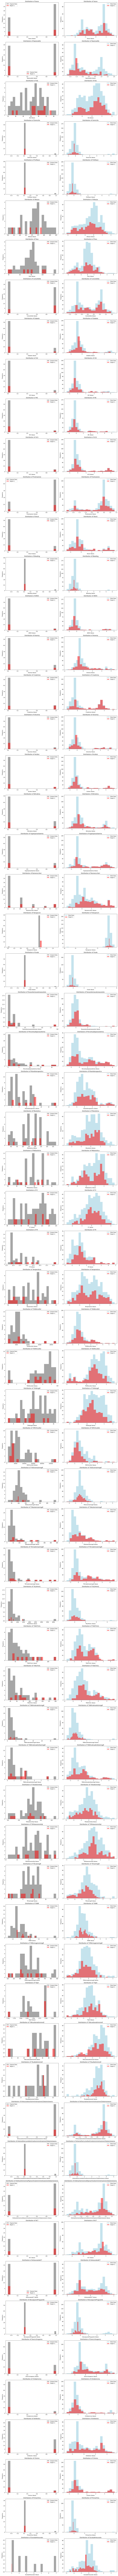

In [415]:
import matplotlib.pyplot as plt

# List of feature names (columns) in your DataFrames
feature_names_filled = trains_df[0].columns
feature_names_original = train_0_base.columns

# Determine the number of rows and columns for subplots
num_features_filled = len(feature_names_filled)
num_features_original = len(feature_names_original)

# Choose the maximum number of features between the two DataFrames
max_num_features = max(num_features_filled, num_features_original)

# Create subplots for features and target, arranged in two columns
fig, axes = plt.subplots(nrows=max_num_features, ncols=2, figsize=(15, 5 * max_num_features))

# Plot histograms for each feature in the filled DataFrame
for i, feature in enumerate(feature_names_filled):
    ax = axes[i][1]

    # Extract the original data from the filled DataFrame
    filled_data = trains_df[0][feature]

    # Calculate the number of cases with target = 1 for this feature
    num_target_1 = np.sum(targets_train_df[0] == 1)

    # Filter data where target = 1 and plot it in red
    target_1_data = filled_data[targets_train_df[0] == 1]

    # Plot the histogram for the filled data
    ax.hist(filled_data, bins=20, alpha=0.7, color='lightblue', label='Filled Data')

    ax.hist(target_1_data, bins=20, alpha=0.5, color='r', label='Target=1')
    
    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel(f'{feature} Values')
    ax.set_ylabel('Frequency')

    # Add a legend
    ax.legend()

# Plot histograms for each feature in the original DataFrame (if it exists)
for i, feature in enumerate(feature_names_original):
    if i < num_features_filled:
        ax = axes[i][0]

        # Extract the original data from the original DataFrame
        original_data = train_0_base[feature]

        # Calculate the number of cases with target = 1 for this feature
        num_target_1 = np.sum(target == 1)

        # Filter data where target = 1 and plot it in red
        target_1_data = original_data[target == 1]

        # Plot the histogram for the original data
        ax.hist(original_data, bins=20, alpha=0.7, color='grey', label='Original Data')

        ax.hist(target_1_data, bins=20, alpha=0.5, color='r', label='Target=1')

        ax.set_title(f'Distribution of {feature}')
        ax.set_xlabel(f'{feature} Values')
        ax.set_ylabel('Frequency')

        # Add a legend
        ax.legend()

# Remove empty subplots if there are more features in one DataFrame than the other
if num_features_filled < num_features_original:
    for i in range(num_features_filled, num_features_original):
        fig.delaxes(axes[i][1])
elif num_features_filled > num_features_original:
    for i in range(num_features_original, num_features_filled):
        fig.delaxes(axes[i][0])

plt.tight_layout()
plt.show()
